### ED Figure 13

In [1]:
%run IMP.ipynb

#### Input Data

In [2]:
dep,lat = temp_wthmp.dep,temp_wthmp.latn
nvar = 3
temp_anom_mp = xr.DataArray(np.zeros((nvar,dep.size,lat.size)))
salt_anom_mp = xr.DataArray(np.zeros((nvar,dep.size,lat.size)))
age_anom_mp  = xr.DataArray(np.zeros((nvar,dep.size,lat.size)))

temp_anom_mp[0,:,:] = temp_mp - temp_cntl
salt_anom_mp[0,:,:] = salt_mp - salt_cntl
age_anom_mp[0,:,:]  = age_mp  - age_cntl

temp_anom_mp[2,:,:] = temp_anom_mp_on_rho_on_dep.T
salt_anom_mp[2,:,:] = salt_anom_mp_on_rho_on_dep.T
age_anom_mp[2,:,:]  = age_anom_mp_on_rho_on_dep.T

temp_anom_mp[1,:,:] = temp_anom_mp[0,:,:] - temp_anom_mp[2,:,:]
salt_anom_mp[1,:,:] = salt_anom_mp[0,:,:] - salt_anom_mp[2,:,:]
age_anom_mp[1,:,:]  = age_anom_mp[0,:,:]  - age_anom_mp[2,:,:]

for ii in range(1,2+1,1):
    temp_anom_mp[ii,:,:] = np.where(np.isnan(temp_cntl),np.nan,temp_anom_mp[ii,:,:].fillna(cc_f))
    salt_anom_mp[ii,:,:] = np.where(np.isnan(salt_cntl),np.nan,salt_anom_mp[ii,:,:].fillna(cc_f))
    age_anom_mp[ii,:,:]  = np.where(np.isnan(age_cntl) ,np.nan,age_anom_mp[ii,:,:].fillna(cc_f))

#### Plot

In [3]:
levs_dens_mean = clev_dens = np.arange(36.82+0.03*3,37.2+0.001,0.03)

levs_salt_anom_1 = np.arange(-1,1.01,0.1)*0.04
levs_temp_anom_1 = np.arange(-1,1.01,0.1)*0.8
levs_age_anom_1  = np.arange(-1,1.01,0.1)*40

levs_salt_anom_2 = np.arange(-1,1.01,0.1)*0.01
levs_temp_anom_2 = np.arange(-1,1.01,0.1)*0.2
levs_age_anom_2  = np.arange(-1,1.01,0.1)*10

rotation_1 = -10
rotation_2 = -30

In [4]:
def make_plot9(salt_anom,temp_anom,age_anom,rho_mean,\
               levs_salt_anom,levs_temp_anom,levs_age_anom,rotation):
    ''''''
    ncol,nrow = 3,3
    
    manual_locations = [(200,2500),(250,4000)]
    x_label = 'Latitude from 1000-m isobath'

    yy = [5000,dep[0]]
    y_ticks,y_ticklabels = cal_dep_label()
    
    subtitles = ['Total','Heave','Water-Mass Transformation']
    labels = ['a)','b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)','m)','n)','o)','q)','r)','s)']
    LABELS = ['SALINITY','SALINITY','SALINITY','TEMPERATURE','TEMPERATURE','TEMPERATURE','AGE','AGE','AGE']
    
    hatch_levs = [cc_f-cc_f*0.1,cc_f+cc_f*0.1]
    hatch_style = ['...']
    hatch_color = 'dimgrey'
    ''''''
    fig,ax = plt.subplots(nrow,ncol,figsize=(4*ncol,4*nrow))
    plt.subplots_adjust(wspace=0.05,hspace=0.05) 
    kk=0
    for ii in np.arange(nrow):
        for jj in np.arange(ncol):
            ax = plt.subplot(nrow,ncol,ii+1)
            ax.set_facecolor('silver')
            ax = plt.subplot(nrow,ncol,kk+1)
            ax.set_facecolor('silver')
            #
            c1 = plt.contour(lat,dep,rho_mean,levels=clev_dens[0:dd+1],colors='black',linestyles='-',linewidths=0.5,zorder=5)
            c2 = plt.contour(lat,dep,rho_mean,levels=clev_dens[dd+1:],colors='black',linestyles='-',linewidths=1.0,zorder=5)
            labels2 = plt.clabel(c2,fontsize=9.5,inline=1,fmt='%2.2f',levels=clev_dens[dd+1+3:],manual=manual_locations)
            for l in labels2:
                l.set_rotation(rotation)
            if ii==0:
                p1 = plt.contourf(lat,dep,salt_anom[jj,:,:],cmap=colormap_salt_anom,levels=levs_salt_anom,extend='both')
                cs1 = plt.contourf(lat,dep,salt_anom[jj,:,:],hatch_levs,colors='none',hatches=hatch_style,extend='none')
                for collection in cs1.collections:
                    collection.set_edgecolor(hatch_color)
                    collection.set_linewidth(0.0)
            elif ii==1:
                p2 = plt.contourf(lat,dep,temp_anom[jj,:,:],cmap=colormap_temp_anom,levels=levs_temp_anom,extend='both')
                cs2 = plt.contourf(lat,dep,temp_anom[jj,:,:],hatch_levs,colors='none',hatches=hatch_style,extend='none')
                for collection in cs2.collections:
                    collection.set_edgecolor(hatch_color)
                    collection.set_linewidth(0.0)
            elif ii==2:
                p3 = plt.contourf(lat,dep,age_anom[jj,:,:],cmap=colormap_age_anom,levels=levs_age_anom,extend='both')
                cs3 = plt.contourf(lat,dep,age_anom[jj,:,:],hatch_levs,colors='none',hatches=hatch_style,extend='none')
                for collection in cs3.collections:
                    collection.set_edgecolor(hatch_color)
                    collection.set_linewidth(0.0)
            ###
            if ii==0:
                ax.set_title(subtitles[jj],fontsize=14,loc='center',y=1.02)
            ax.set_title(labels[kk]+' '+LABELS[kk],fontsize=13,loc='left',x=0.015,y=0.005)
            kk=kk+1
            
            plt.gca().invert_yaxis()
            plt.xlim(xx)
            plt.ylim(yy)
            plt.xticks(x_ticks,x_ticklabels)
            plt.yticks(y_ticks,y_ticklabels)
            plt.xlabel(x_label,fontsize=10,labelpad=5)
            plt.ylabel('Depth [km]',fontsize=10,labelpad=5)
            plt.tick_params(labelsize=9,direction='out',length=5)
            
    for ax in fig.get_axes():
        ax.label_outer()
        
    # Plot a colorbar
    cax1 = plt.axes([0.935,0.637,0.0125,0.242])
    cax2 = plt.axes([0.935,0.381,0.0125,0.242])
    cax3 = plt.axes([0.935,0.125,0.0125,0.242])
    
    cb1 = plt.colorbar(p1,cax=cax1,orientation='vertical',ticks=levs_salt_anom[::5])
    cb2 = plt.colorbar(p2,cax=cax2,orientation='vertical',ticks=levs_temp_anom[::5])
    cb3 = plt.colorbar(p3,cax=cax3,orientation='vertical',ticks=levs_age_anom[::5])
    
    cb1.ax.tick_params(axis='y',direction='in',length=6,labelsize=10)
    cb2.ax.tick_params(axis='y',direction='in',length=6,labelsize=10)
    cb3.ax.tick_params(axis='y',direction='in',length=6,labelsize=10)
    
    cb1.ax.set_ylabel(title_salt+' Anomaly ['+unit_salt+']',fontsize=11.5,labelpad=2)
    cb2.ax.set_ylabel(title_temp+' Anomaly ['+unit_temp+']',fontsize=11.5,labelpad=2)
    cb3.ax.set_ylabel('Age Anomaly ['+unit_age +']',fontsize=11.5,labelpad=2)
    
    cax1.yaxis.set_label_position('left')
    cax2.yaxis.set_label_position('left')
    cax3.yaxis.set_label_position('left')

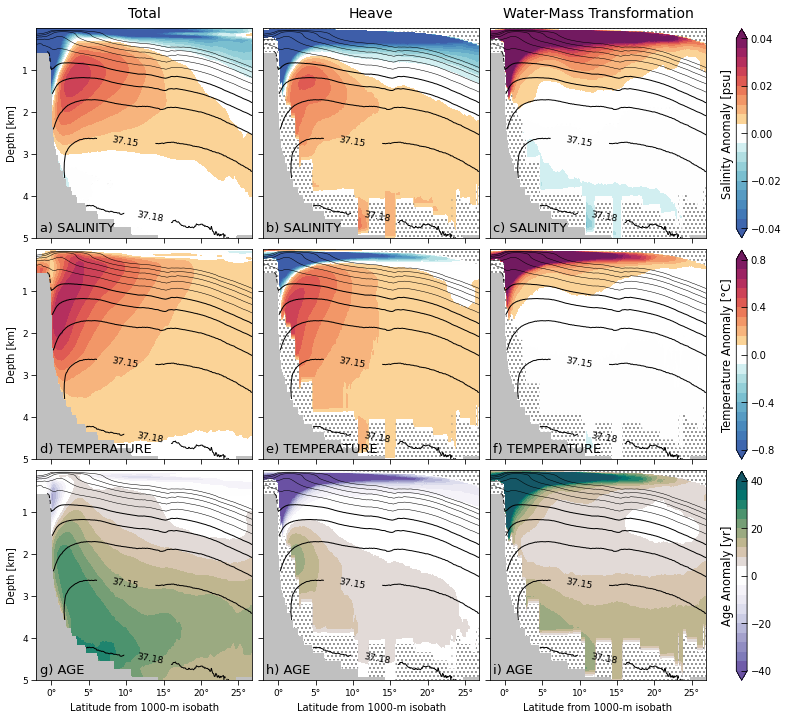

In [5]:
make_plot9(salt_anom_mp,temp_anom_mp,age_anom_mp,rho_mp,\
           levs_salt_anom_1,levs_temp_anom_1,levs_age_anom_1,rotation_1)